<a href="https://colab.research.google.com/github/LamineTourelab/Tutorial/blob/main/machine%20learning/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder with both traditional NN and CNN

An autoencoder neural network is an unsupervised machine learning algorithm. In an autoencoder, the number of hidden cells is smaller than the input cells. The number of input cells in autoencoders equals to the number of output cells. On an AE network, we train it to display the output, which is as close as the fed input, which forces AEs to find common patterns and generalize the data. We use autoencoders for the smaller representation of the input. This property is useful in many applications, in particular in compressing data or comparing images on a metric beyond pixel-level comparisons.



## Autoencoder with traiditional NN

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torchvision
import numpy as np

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

### Dataset

In [ ]:

# Define the transform to preprocess the data
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
mnist_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Define the data loader
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

mnist_data_test = datasets.MNIST(root='.', train=False, download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(mnist_data_test, batch_size=64, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



### Model Build
It is composed of two main parts: an encoder and a decoder. The encoder maps the input data to a lower-dimensional representation (also known as the bottleneck or latent representation), and the decoder maps the bottleneck representation back to the original input space (reconstruction). The goal of the autoencoder is to learn a compact representation of the input data that can be used for tasks such as dimensionality reduction, denoising, and generative modeling.

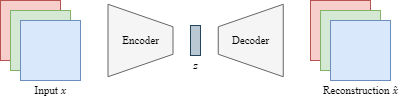

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        '''A class that implements an AutoEncoder with NN linear
           Implementation of the Encoder and the decoder. Input size is 784 while using the MNISt dataset.
         Remember the input of the encoder is the same as the last output of decoder
        '''
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32))
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid())

    def forward(self, x):
        """
        The forward function takes in an image (x) and returns the reconstructed image.
        The latent is also returned in this case while it can be used for the visualization of latent representation
        """
        latent = self.encoder(x)
        x = self.decoder(latent)
        return x,latent

# Define the model and move it to the device
model = Autoencoder()
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.parameters

<bound method Module.parameters of Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Sigmoid()
  )
)>

In [ ]:
help(model)

### Train Model

In [ ]:

# Train the model
for epoch in range(10):
    for data in data_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(device)

        output, latent = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, 10, loss.item()))

Epoch [1/10], Loss: 0.0311
Epoch [2/10], Loss: 0.0249
Epoch [3/10], Loss: 0.0208
Epoch [4/10], Loss: 0.0159
Epoch [5/10], Loss: 0.0126
Epoch [6/10], Loss: 0.0125
Epoch [7/10], Loss: 0.0132
Epoch [8/10], Loss: 0.0132
Epoch [9/10], Loss: 0.0114
Epoch [10/10], Loss: 0.0096


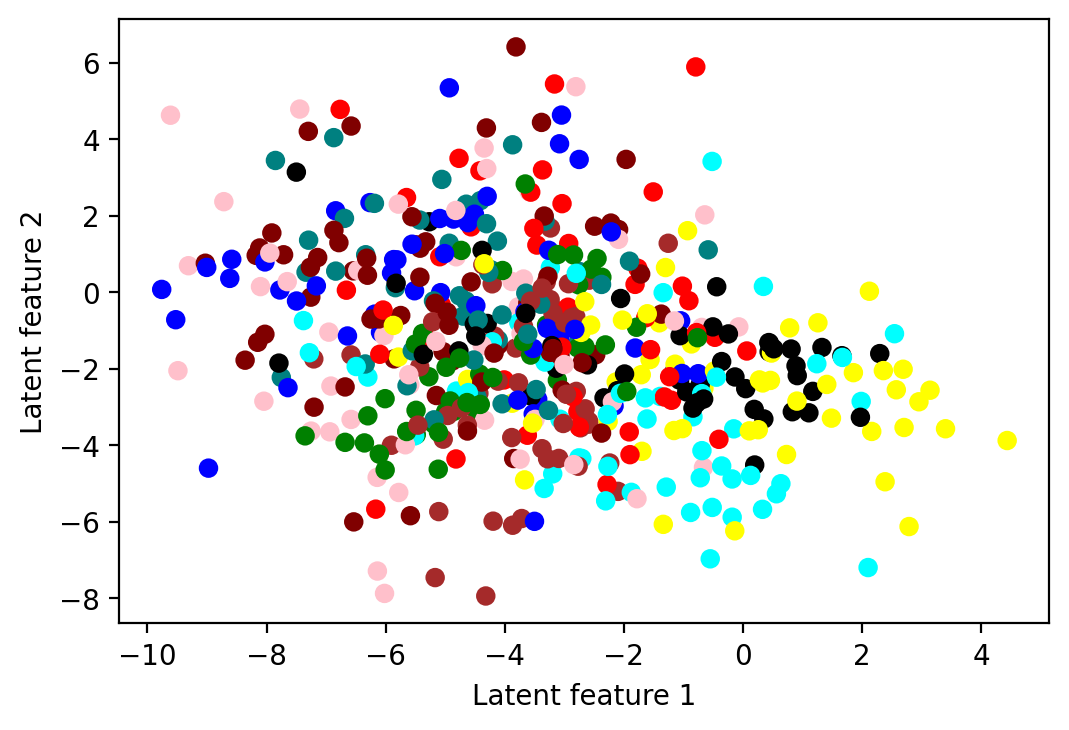

In [ ]:
# Visualize the original and reconstructed images
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

dataloader = DataLoader(mnist_data, batch_size=512, shuffle=True)
for data in dataloader:
        img, labels = data
        img = img.view(img.size(0), -1)
        model.cpu()
        _,latent = model(img)
        break

d = {0: 'red', 1: "green", 2: "blue", 3: "maroon", 4: "yellow",
     5: "pink", 6: "brown", 7: "black", 8: "teal", 9: "aqua"}

colors = []
for e in labels.numpy():
    colors.append(d[e])

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
ax.set_xlabel('Latent feature 1')
ax.set_ylabel('Latent feature 2')

ax.scatter(latent[:,0].detach().numpy(), latent[:,1].detach().numpy(),
           c=list(colors))

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE
tsne = TSNE()
X_valid_2D = tsne.fit_transform(torch.Tensor.numpy(latent, force=True))
#X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


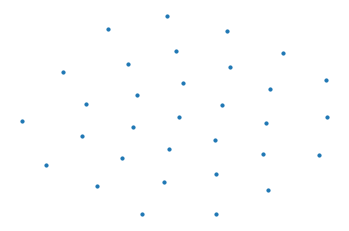

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], s=10, cmap="tab10")
plt.axis("off")
plt.show()

## Autoencoder with CNN

In this part, we will inplement AE using the “deconvolution” (or transposed convolution) with Conv2D and ConvTranspose2d. Conv2D is mainly used when you want to detect features, e.g., in the encoder part of an autoencoder model, and it may shrink your input shape (that's the main idea of the encode to reduce dimension).
Conversely, Conv2DTranspose is used for creating features, for example, in the decoder part of an autoencoder model for constructing an image (for the reconstruction). It makes the input shape larger.

### Dataset

In [ ]:
# Load the data
transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Model Build

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

class Autoencoder(nn.Module):
    def __init__(self):
        """
        A Conv2d module applies a 2D convolution over an input signal composed of several input planes.
        We define:
        kernel_size: Size of the convolving kernel
        stride : controls the stride for the cross-correlation, a single number or a tuple.
        padding : controls the amount of padding applied to the input.
        in_channels : 3. In CIFAR10, each image has 3 color channels and is 32x32 pixels large.
        So we can use 3 channels instead of using the black-and-white
        out_channels : 6
        As always the input of the decoder is the output of the encoder and the decoder reconstruct the initial data (so output is 3).
        """
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 6, kernel_size=2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(6, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create the model
model = Autoencoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.parameters

<bound method Module.parameters of Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)>

In [ ]:
device

device(type='cuda')

### Model Train

In [ ]:
batch_size = 64
num_epochs = 2

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, data in enumerate(trainloader):
        data,_ = data
        data= data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,data)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))

In [ ]:
model=model.to(device)
for epoch in range(5):
    train(model, device, trainloader, optimizer, epoch)

Train Epoch: 0 [0/50000 (0%)]	Loss: 0.063875
Train Epoch: 0 [6400/50000 (13%)]	Loss: 0.045370
Train Epoch: 0 [12800/50000 (26%)]	Loss: 0.014933
Train Epoch: 0 [19200/50000 (38%)]	Loss: 0.006535
Train Epoch: 0 [25600/50000 (51%)]	Loss: 0.004210
Train Epoch: 0 [32000/50000 (64%)]	Loss: 0.003744
Train Epoch: 0 [38400/50000 (77%)]	Loss: 0.002354
Train Epoch: 0 [44800/50000 (90%)]	Loss: 0.002912
Train Epoch: 1 [0/50000 (0%)]	Loss: 0.002052
Train Epoch: 1 [6400/50000 (13%)]	Loss: 0.002402
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.001827
Train Epoch: 1 [19200/50000 (38%)]	Loss: 0.001971
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.002260
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.001934
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.001922
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.001997
Train Epoch: 2 [0/50000 (0%)]	Loss: 0.002196
Train Epoch: 2 [6400/50000 (13%)]	Loss: 0.001842
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.001902
Train Epoch: 2 [19200/50000 (38%)]	Loss: 0.001880
Train Epoch: 2 [25

In [ ]:
model = model.to(device)
for epoch in range(5):
    for data in trainloader:
        img, _ = data
        img = img.to(device)
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('eppoch [{}/{}], loss:{:.4f}'.format(epoch+1, 5, loss.item()))

eppoch [1/5], loss:0.0067
eppoch [2/5], loss:0.0014
eppoch [3/5], loss:0.0025
eppoch [4/5], loss:0.0009
eppoch [5/5], loss:0.0014
